In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# 1) Implement a KNN model to classify the animals in to categorie

In [3]:
df1=pd.read_csv('zoo.csv')
df1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df1.shape

(101, 18)

In [5]:
df1.size

1818

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df1.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
df1.duplicated().any()

False

In [9]:
target1=df1[['animal name']]
target1

,animal name
0,aardvark
1,antelope
2,bass
3,bear
4,boar
...,...
96,wallaby
97,wasp
98,wolf
99,worm


In [10]:
n_classes=len(df1['animal name'].unique())
n_classes

100

In [11]:
features1=df1.drop('animal name',axis=1)
features1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features1,target1,train_size=0.75,random_state=10)

In [13]:
x_train1.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [14]:
x_test1.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [15]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(75, 17)
(75, 1)
(26, 17)
(26, 1)


In [16]:
scaler=StandardScaler()

In [17]:
x_train1=scaler.fit_transform(x_train1)

In [18]:
x_test1=scaler.transform(x_test1)

In [19]:
knn1=KNeighborsClassifier()

In [20]:
knn1.fit(x_train1,y_train1)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
y_pred1=knn1.predict(x_test1)
y_pred1

array(['crow', 'boar', 'clam', 'flea', 'catfish', 'aardvark', 'chub',
       'chub', 'flamingo', 'clam', 'crow', 'catfish', 'buffalo', 'flea',
       'catfish', 'boar', 'frog', 'crow', 'boar', 'carp', 'clam', 'frog',
       'flamingo', 'clam', 'boar', 'boar'], dtype=object)

In [22]:
accuracy_score(y_test1,y_pred1)

0.038461538461538464

In [23]:
y_probs1=knn1.predict_proba(x_test1)
y_probs1

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0.2, 0. , 0. ],
       [0. , 0.2, 0. , ..., 0.2, 0. , 0. ]])

In [24]:
conf1= confusion_matrix(y_test1,y_pred1)
conf1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

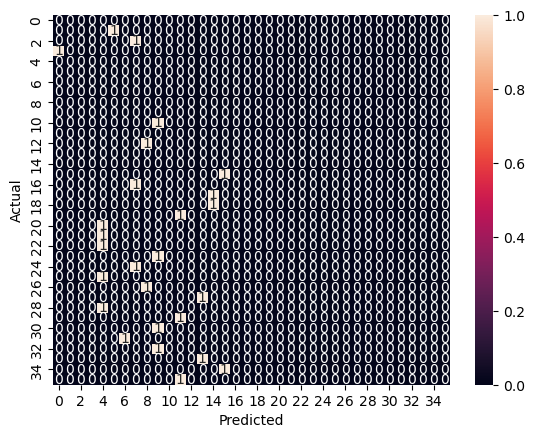

In [25]:
sns.heatmap(conf1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
classification_report(y_test1,y_pred1)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classif

'              precision    recall  f1-score   support\n\n    aardvark       0.00      0.00      0.00         0\n    antelope       0.00      0.00      0.00         1\n        bass       0.00      0.00      0.00         1\n        bear       0.00      0.00      0.00         1\n        boar       0.00      0.00      0.00         0\n     buffalo       0.00      0.00      0.00         0\n        carp       0.00      0.00      0.00         0\n     catfish       0.00      0.00      0.00         0\n        chub       0.00      0.00      0.00         0\n        clam       0.00      0.00      0.00         0\n        crab       0.00      0.00      0.00         1\n        crow       0.00      0.00      0.00         0\n     dolphin       0.00      0.00      0.00         1\n    flamingo       0.00      0.00      0.00         0\n        flea       0.00      0.00      0.00         0\n        frog       0.50      1.00      0.67         1\n     herring       0.00      0.00      0.00         1\n    hon

In [27]:
y_test1.sum()

animal name    skuaplatypusstarfishhoneybeeherringbeardolphin...
dtype: object

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


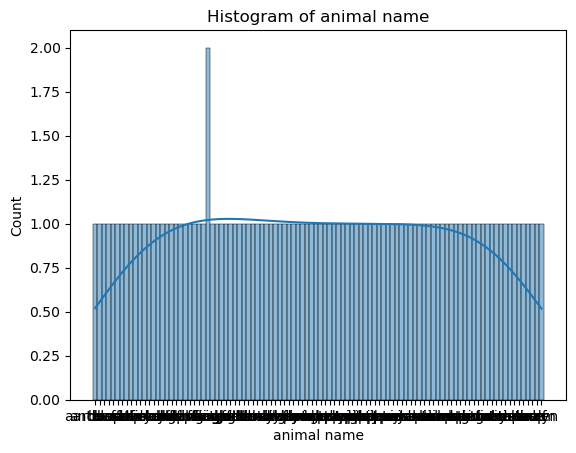

In [28]:
# Histogram
sns.histplot(df1['animal name'],kde=True)
plt.title('Histogram of animal name')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

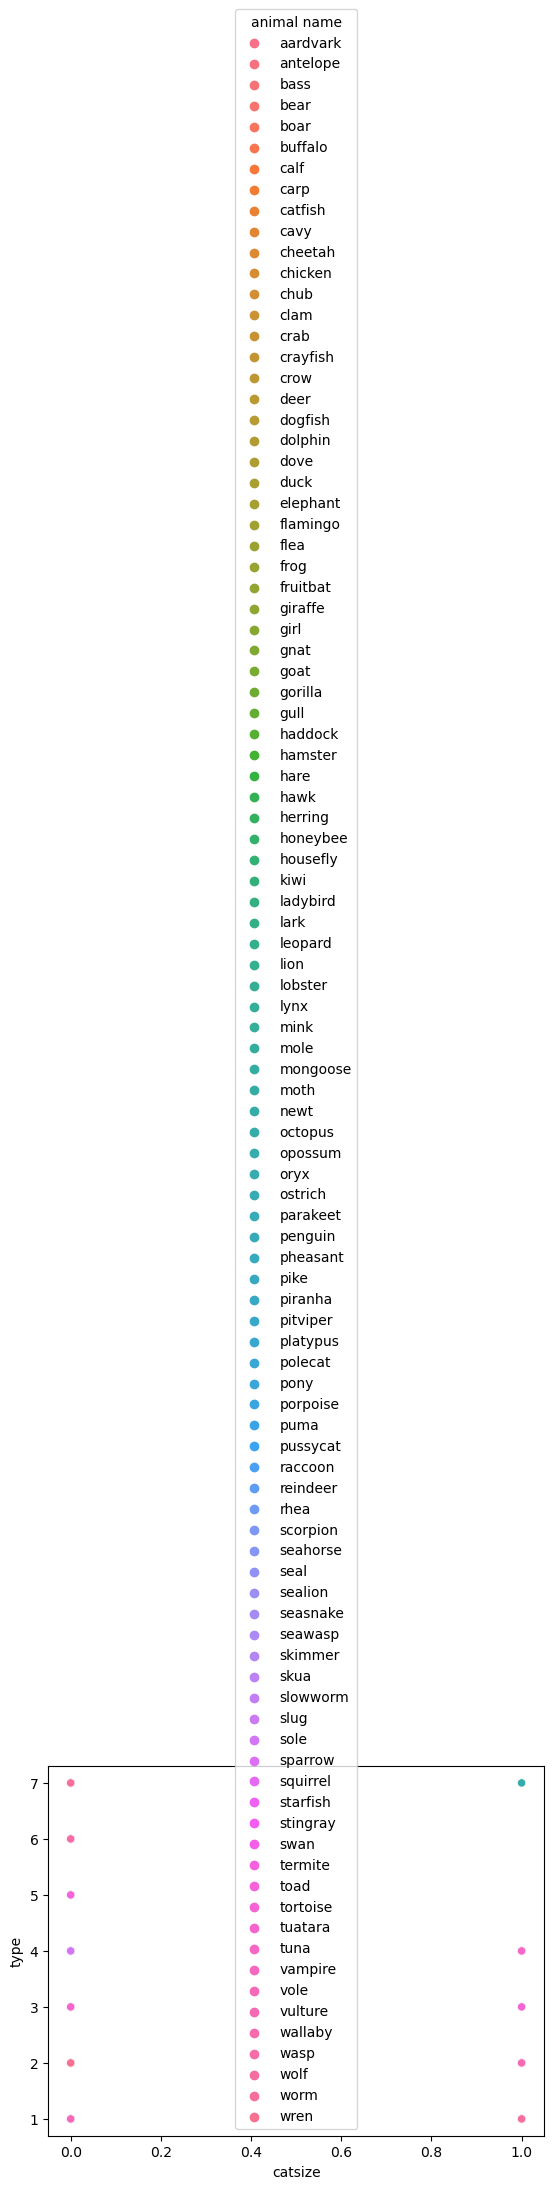

In [29]:
# Scatter plot
sns.scatterplot(data=df1,x='catsize',y='type',hue='animal name')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

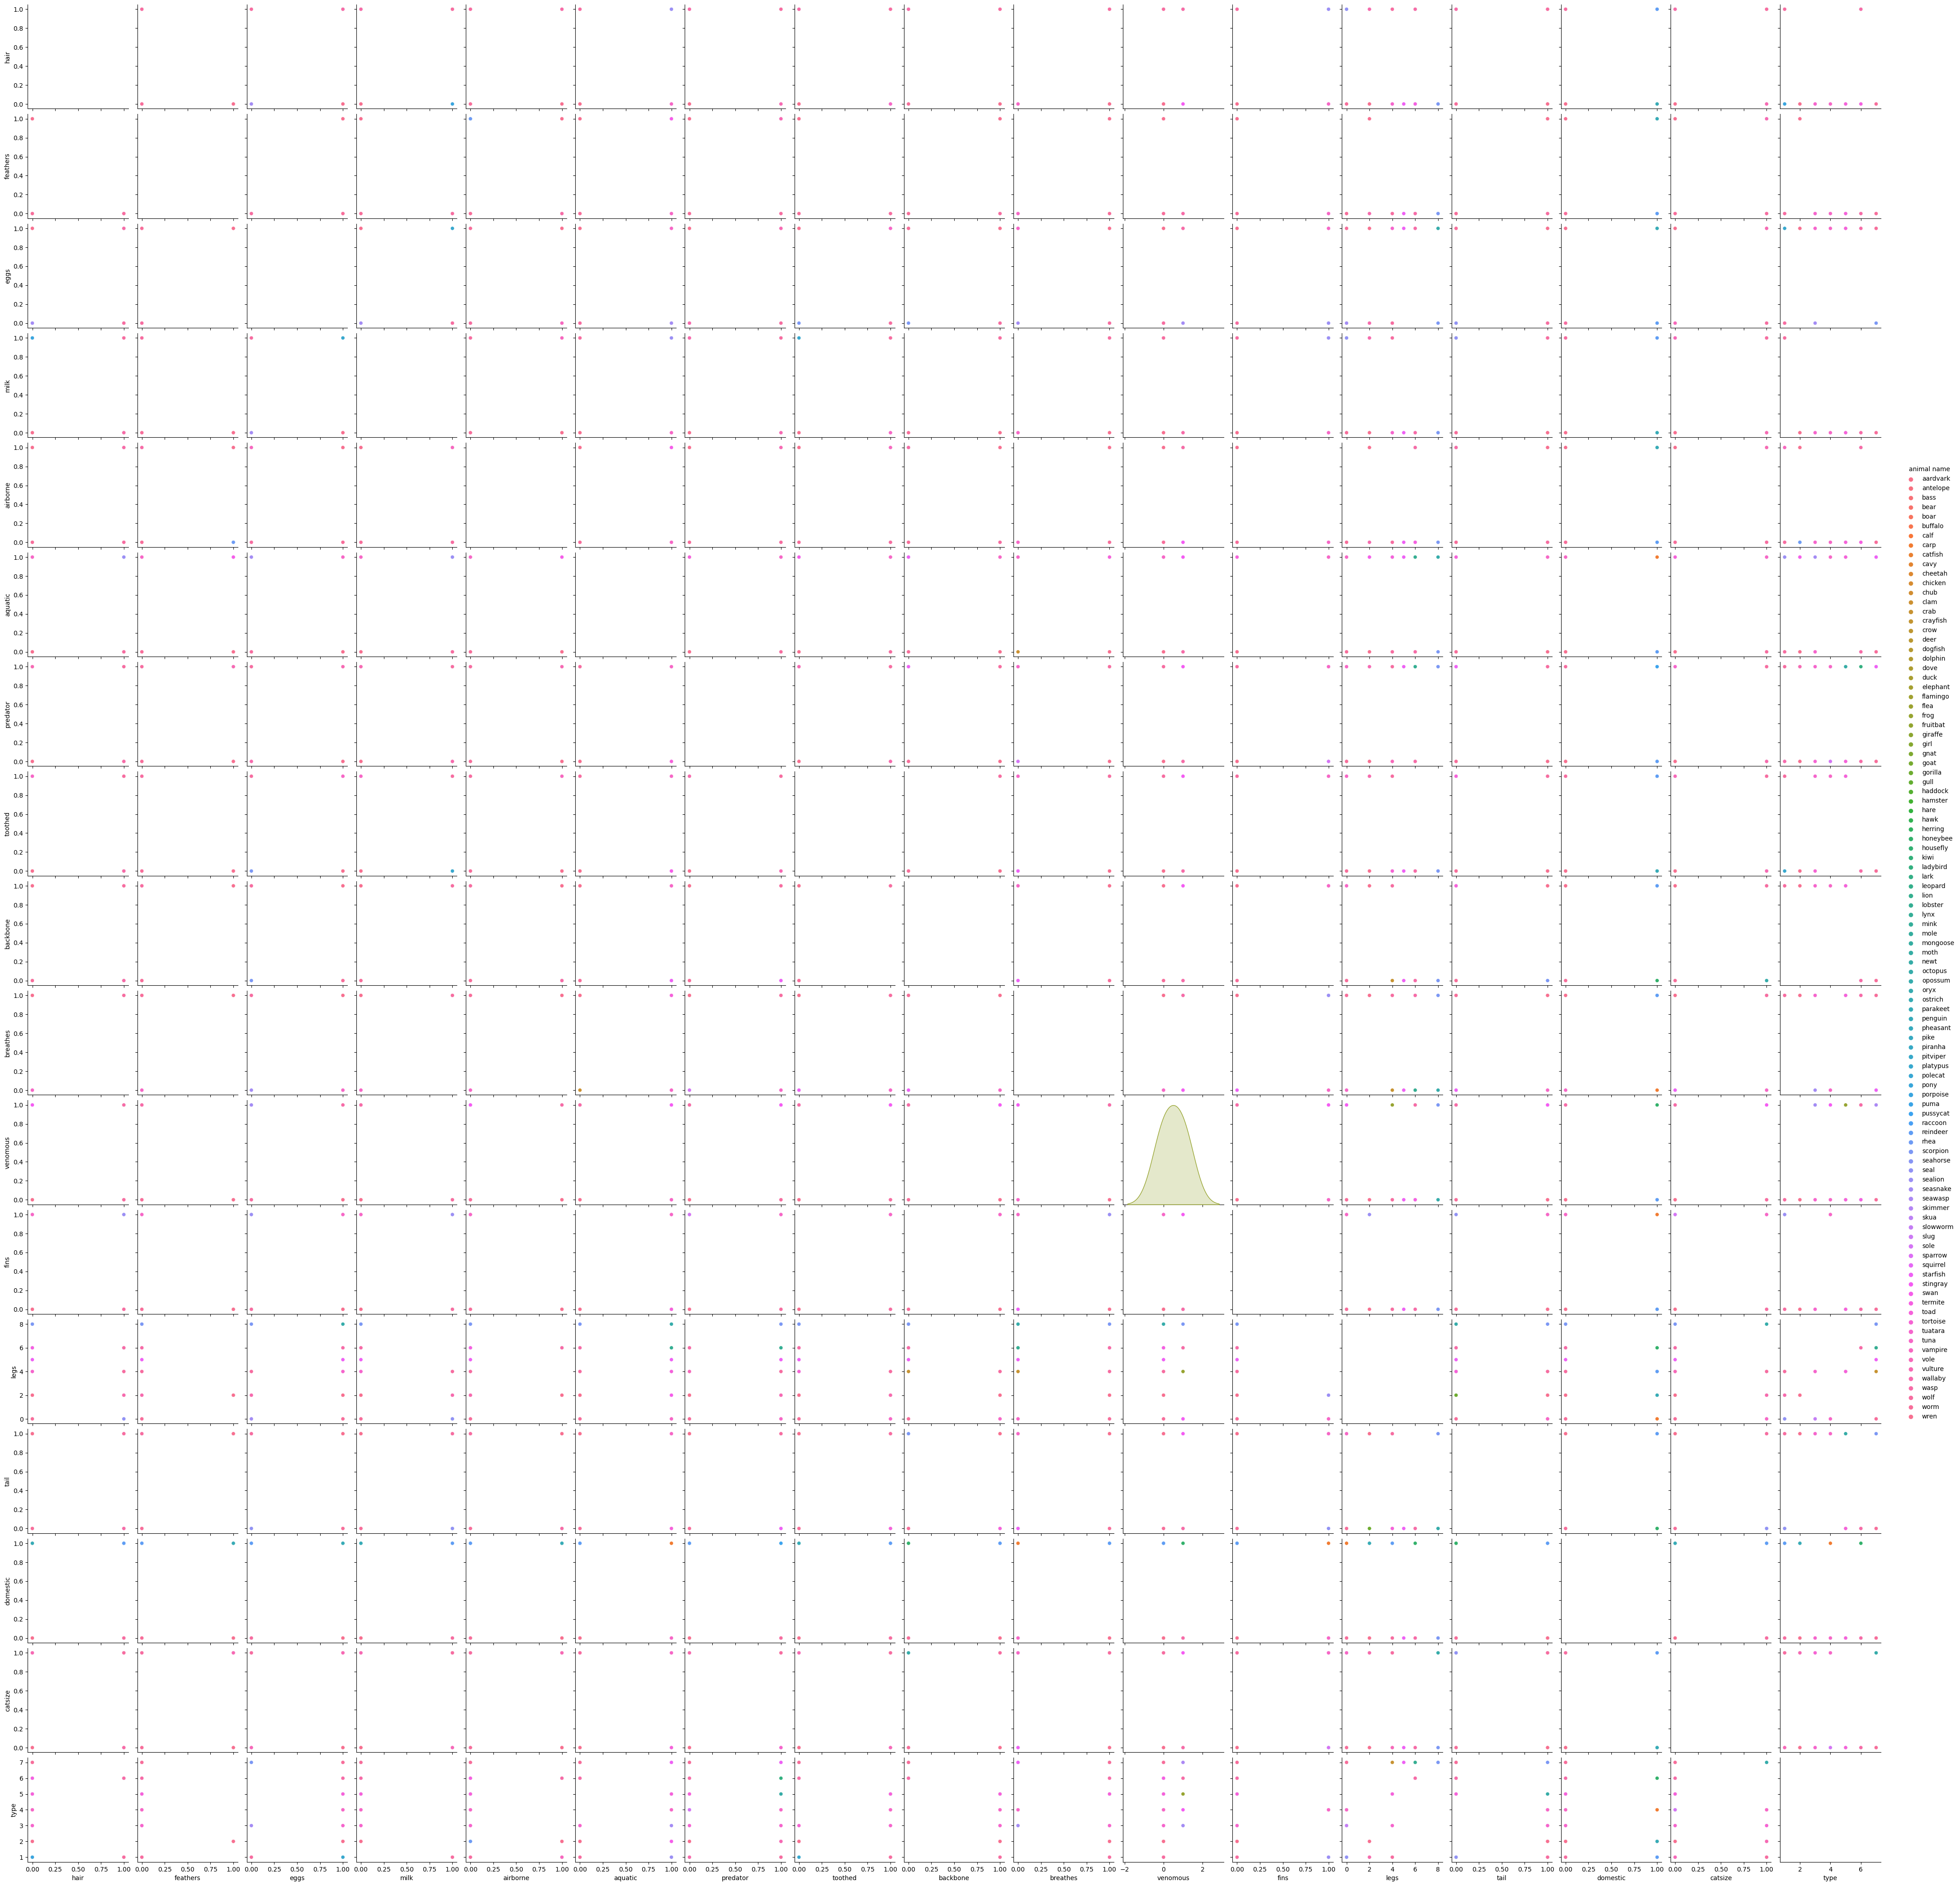

In [30]:
# Pairplot
sns.pairplot(df1,hue='animal name')
plt.show()

##### Optimum value of k

In [31]:
k_values1=list(range(1,20)) 
accuracies1=[]

In [34]:
for k in k_values1:
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(x_train1,y_train1)
    accuracy=knn1.score(x_test1,y_test1)
    accuracies1.append(accuracy)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

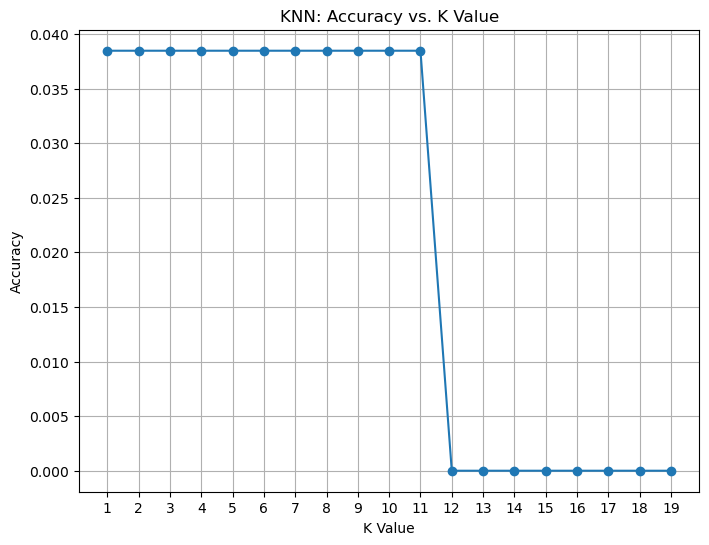

In [35]:
plt.figure(figsize=(8,6))
plt.plot(k_values1,accuracies1,marker='o',linestyle='-')
plt.title('KNN: Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values1)
plt.grid(True)
plt.show()

In [36]:
# 2) Prepare a model for glass classification using KNN

# Data Description:

# RI : refractive index
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# AI: Aluminum
# Si: Silicon
# K:Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron

# Type: Type of glass: (class attribute)
# 1 -- building_windows_float_processed
# 2 --building_windows_non_float_processed
# 3 --vehicle_windows_float_processed
# 4 --vehicle_windows_non_float_processed (none in this database)
# 5 --containers
# 6 --tableware
# 7 --headlamps

In [37]:
df2=pd.read_csv('glass.csv')
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [38]:
df2.shape

(214, 10)

In [39]:
df2.size

2140

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [41]:
df2.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [42]:
df2.duplicated().any()

True

In [43]:
df2.drop_duplicates(inplace=True)
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [44]:
target2=df2[['Type']]
target2

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [45]:
features2=df2.drop('Type',axis=1)
features2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [46]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=10)

In [47]:
x_train2.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [48]:
x_test2.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [49]:
x_train2=scaler.fit_transform(x_train2)

In [50]:
x_test2=scaler.transform(x_test2)

In [51]:
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(159, 9)
(54, 9)
(159, 1)
(54, 1)


In [52]:
knn2=KNeighborsClassifier()

In [53]:
best_params2={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'p':[1,2,3]}

In [54]:
grid_search2=GridSearchCV(knn2,best_params2,cv=None,scoring='accuracy')

In [55]:
grid_search2.fit(x_train2,y_train2)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
grid_search2.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

In [57]:
knn2=KNeighborsClassifier(n_neighbors=9,p=2,weights='distance')

In [58]:
knn2.fit(x_train2,y_train2)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [59]:
y_pred2=knn2.predict(x_test2)
y_pred2

array([7, 7, 1, 2, 2, 1, 2, 1, 1, 1, 1, 7, 1, 2, 2, 5, 2, 1, 2, 2, 3, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 6, 1, 2, 2, 2, 6, 1, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 7, 1, 2, 1], dtype=int64)

In [60]:
accuracy_score(y_test2,y_pred2)

0.6851851851851852

In [61]:
y_probs2=knn2.predict_proba(x_test2)
y_probs2

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.20560553, 0.21480725, 0.        , 0.13150723, 0.        ,
        0.44807999],
       [0.46488782, 0.45660081, 0.07851137, 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.7921083 , 0.        , 0.2078917 , 0.        , 0.        ,
        0.        ],
       [0.32336413, 0.49544275, 0.18119312, 0.        , 0.        ,
        0.        ],
       [0.56366564, 0.21419208, 0.22214229, 0.        , 0.        ,
        0.        ],
       [0.80602725, 0.        , 0.19397275, 0.        , 0.        ,
        0.        ],
       [0.81406253, 0.        , 0.18593747, 0.        , 0.        ,
        0.        ],
       [0.78478967, 0.        , 0.21521033, 0.        , 0.        ,
        0.        ],
       [0.        , 0

In [62]:
conf2=confusion_matrix(y_test2,y_pred2)
conf2

array([[16,  7,  1,  0,  0,  0],
       [ 4, 13,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

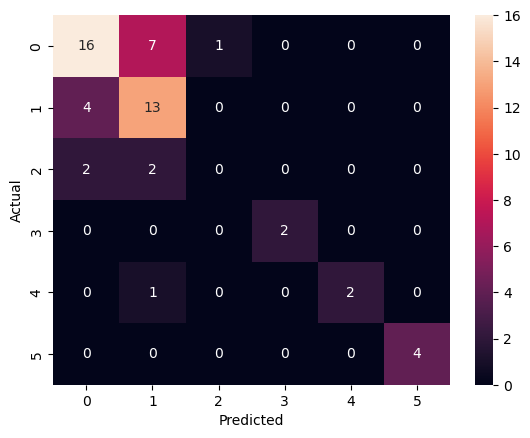

In [63]:
sns.heatmap(conf2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
classification_report(y_test2,y_pred2)

'              precision    recall  f1-score   support\n\n           1       0.73      0.67      0.70        24\n           2       0.57      0.76      0.65        17\n           3       0.00      0.00      0.00         4\n           5       1.00      1.00      1.00         2\n           6       1.00      0.67      0.80         3\n           7       1.00      1.00      1.00         4\n\n    accuracy                           0.69        54\n   macro avg       0.72      0.68      0.69        54\nweighted avg       0.67      0.69      0.67        54\n'

In [65]:
y_test2.value_counts()

Type
1       24
2       17
3        4
7        4
6        3
5        2
Name: count, dtype: int64

In [66]:
y_test2.sum()

Type    126
dtype: int64

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


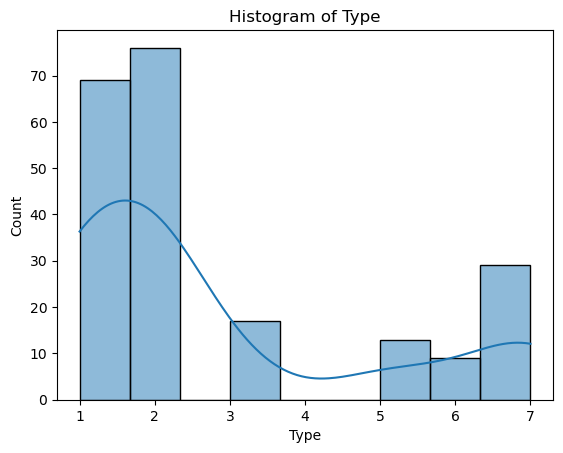

In [67]:
# Histogram
sns.histplot(df2['Type'],kde=True)
plt.title('Histogram of Type')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


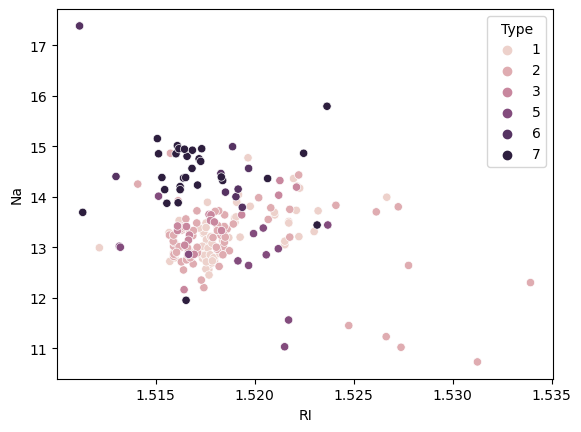

In [68]:
# Scatter plot
sns.scatterplot(data=df2,x='RI',y='Na',hue='Type')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

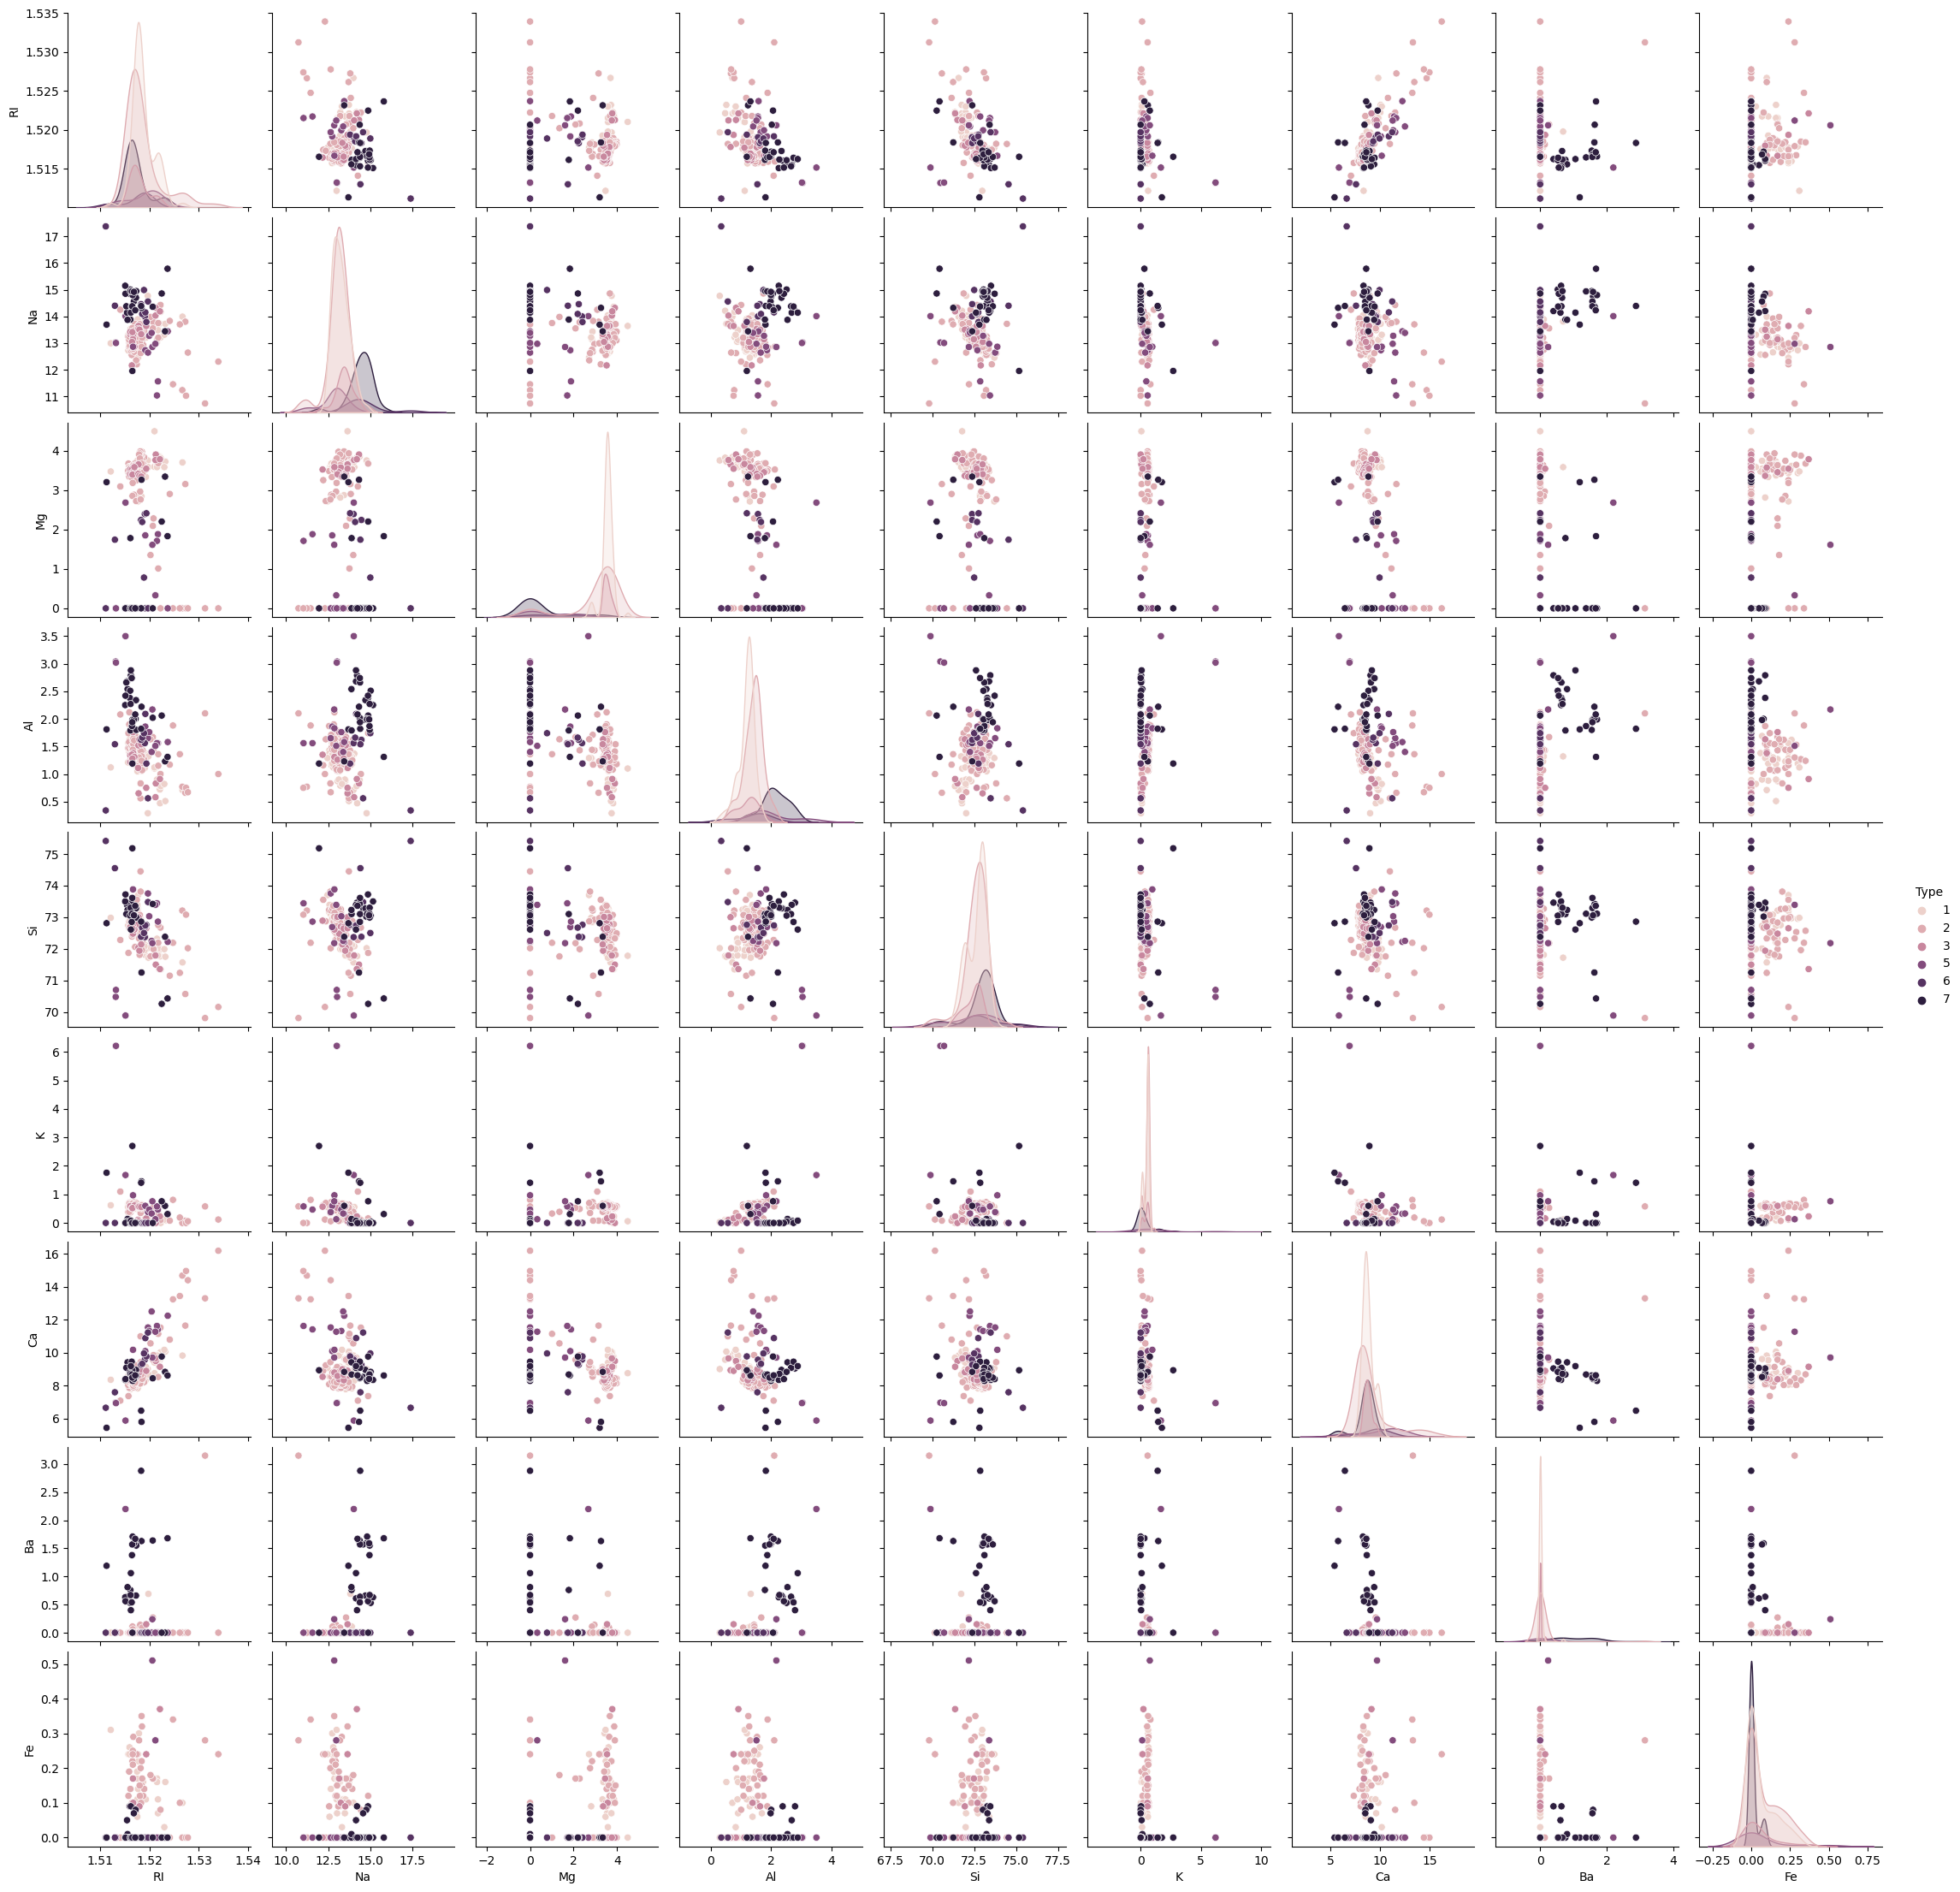

In [69]:
# Pairplot
sns.pairplot(df2,hue='Type')
plt.show()

##### Optimum value of k

In [70]:
k_values2=list(range(1,20)) 
accuracies2=[]

In [71]:
for k in k_values2:
    knn2=KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_train2,y_train2)
    accuracy=knn2.score(x_test2,y_test2)
    accuracies2.append(accuracy)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

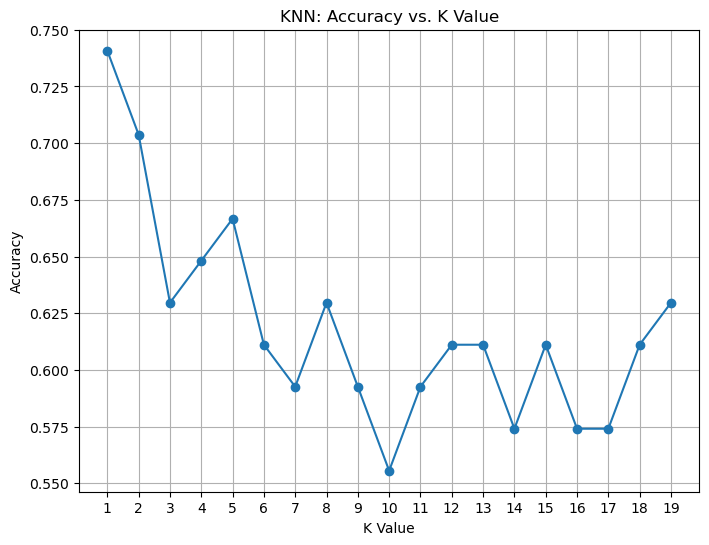

In [72]:
plt.figure(figsize=(8,6))
plt.plot(k_values2,accuracies2,marker='o',linestyle='-')
plt.title('KNN: Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values2)
plt.grid(True)
plt.show()